In [1]:
using HCubature
using Distributions

#### Get collision probability

In [2]:
function get_collision_probability_node2(n1,t1,n2,t2,nn,lambda;bound_max=100.0)

    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1-y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end

    a = [-100.0;0.0]
    b = [0.0,100.0]
    m = [0.0;0.0]
    n = [100.0,100.0]
    
    #bound = max(t1+n1,t2+n2)*lambda + 30.0
    bound = bound_max
    
    o = bound.*[-1.0,-1.0]
    p = bound.*[1.0,1.0]

    C, err = hcubature(h,o,p,maxevals=10^8)

    return C, err
end

get_collision_probability_node2 (generic function with 1 method)

#### Density

In [74]:
function pdensity(y,t;n1=20,t1=20,n2=50,t2=50,nn=5,lambda=0.5)
    return (1-cdf(Gamma(nn,lambda),abs(t2-t1-y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
end

pdensity (generic function with 1 method)

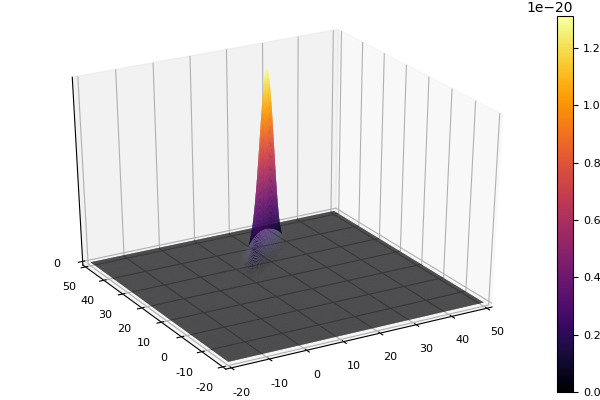

In [78]:
using Plots; pyplot()
x=range(-20,stop=50,length=300)
y=range(-20,stop=50,length=300)
plot(x,y,pdensity,st=:surface,camera=(-30,30))

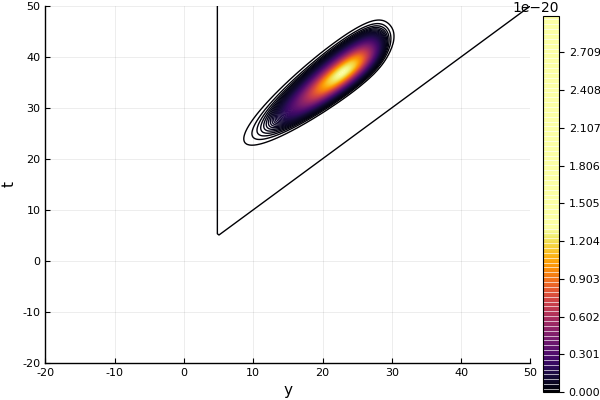

In [79]:
plot(contour(x, y, pdensity; levels = collect(range(0,stop=0.00000000000000000003,length=300))),xlabel="y",ylabel="t")